# My First Convolutional Neural Network

## CIFAR-10

#### 실습목표<br>
1. CNN의 기본 아이디어를 안다.
2. CNN의 구조를 그리고, 코드로 옮길 수 있다.

## Real Game : CNN on CIFAR-10

여기에서는 여러분이 직접 코드를 완성해야 하는 문제가 곳곳에 있습니다!

In [ ]:
'''
matplolib inline 명령어를 통해서
matplot으로 그리는 플롯들을 주피터 노트북 내에서 볼 수 있게 해준다.
포맷을 retina로 바꾸면 그래프의 화질이 훨씬 좋아진다.
'''
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

'''
라이브러리들을 불러오자.
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras


from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import *
from tensorflow.keras import layers, models
from tensorflow.keras import backend

import random as rd

from sklearn.metrics import accuracy_score

### Data Loading

In [ ]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 6s 0us/step


In [ ]:
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [ ]:
labels = { 0 : 'Airplane',
          1 : 'Automobile',
          2 : 'Bird',
          3 : 'Cat',
          4 : 'Deer',
          5 : 'Dog',
          6 : 'Frog',
          7 : 'Horse',
          8 : 'Ship',
          9 : 'Truck' }

print(labels)

{0: 'Airplane', 1: 'Automobile', 2: 'Bird', 3: 'Cat', 4: 'Deer', 5: 'Dog', 6: 'Frog', 7: 'Horse', 8: 'Ship', 9: 'Truck'}


id = 5384
다음 그림은 Frog 입니다.


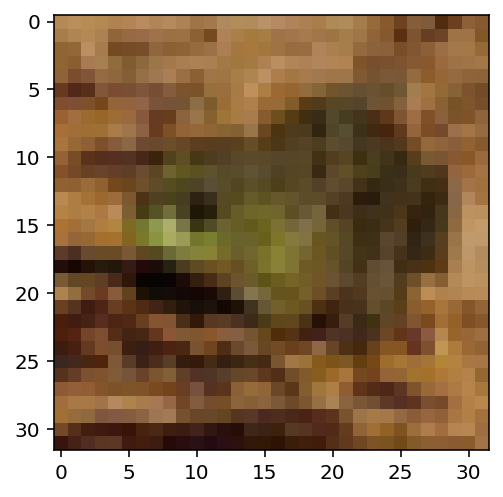

In [ ]:
'''
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)

print(f'id = {id}')
print(f'다음 그림은 {labels[test_y[id][0]]} 입니다.')
plt.imshow(test_x[id])
plt.show()

### X : 표준화 Scaling (standardization)

$$ X_{scaled} = {{x_{original} - mean(x)}\over{std(x)} } $$

In [ ]:
mean_x, std_x = train_x.mean(), train_x.std()
train_x = (train_x - mean_x) / std_x
test_x = (test_x - mean_x) / std_x

### Y : One-Hot Encoding

In [ ]:
from tensorflow.keras.utils import to_categorical

n_class = len(np.unique(train_y))
train_y = to_categorical(train_y, n_class)
test_y = to_categorical(test_y, n_class)

### 코드를 완성해주세요!

#### **model.fit( ) 을 history 에 담아서 학습 과정의 로그를 남길 것.**

**자유롭게 먼저 해보는 것을 추천**

**구조를 따라서 코딩을 한다면..**

0. Functional, Sequential 중 택일
1. 인풋레이어
1. Convolution : 필터수 32개, 사이즈(3, 3), same padding
2. Convolution : 필터수 32개, 사이즈(3, 3), same padding
3. BatchNormalization
4. MaxPooling : 사이즈(2,2) 스트라이드(2,2)
5. DropOut : 25% 비활성화
1. Convolution : 필터수 64개, 사이즈(3, 3), same padding
2. Convolution : 필터수 64개, 사이즈(3, 3), same padding
3. BatchNormalization
4. MaxPooling : 사이즈(2,2) 스트라이드(2,2)
5. DropOut : 25% 비활성화
6. Flatten( )
7. Fully Connected Layer : 노드 1024개
3. BatchNormalization
5. DropOut : 35% 비활성화
9. 아웃풋레이어

* EarlyStopping 의 옵션도 조절해보자.

In [ ]:
backend.clear_session()

inputs = Input(shape=(32, 32, 3))
x = inputs

x = Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu')(x)
x = Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2, 2), strides=(2, 2))(x)
x = Dropout(0.25)(x)

x = Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu')(x)
x = Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2, 2), strides=(2, 2))(x)
x = Dropout(0.25)(x)

x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.35)(x)

outputs = Dense(10, activation='softmax')(x)

model = models.Model(inputs, outputs)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
es = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1, restore_best_weights=True)

#### 모델 학습

In [ ]:
history = model.fit(train_x, train_y, validation_split=0.2, verbose=1, callbacks=[es], epochs=100)

Epoch 1/100
1250/1250 [==============================] - 19s 6ms/step - loss: 1.5649 - accuracy: 0.4837 - val_loss: 1.3511 - val_accuracy: 0.5401
Epoch 2/100
1250/1250 [==============================] - 7s 6ms/step - loss: 1.0677 - accuracy: 0.6281 - val_loss: 0.9723 - val_accuracy: 0.6517
Epoch 3/100
1250/1250 [==============================] - 8s 7ms/step - loss: 0.9331 - accuracy: 0.6751 - val_loss: 0.9261 - val_accuracy: 0.6881
Epoch 4/100
1250/1250 [==============================] - 8s 6ms/step - loss: 0.8247 - accuracy: 0.7110 - val_loss: 0.8157 - val_accuracy: 0.7194
Epoch 5/100
1250/1250 [==============================] - 8s 6ms/step - loss: 0.7287 - accuracy: 0.7453 - val_loss: 0.7212 - val_accuracy: 0.7550
Epoch 6/100
1250/1250 [==============================] - 8s 6ms/step - loss: 0.6602 - accuracy: 0.7678 - val_loss: 0.6990 - val_accuracy: 0.7643
Epoch 7/100
1250/1250 [==============================] - 7s 6ms/step - loss: 0.6002 - accuracy: 0.7893 - val_loss: 0.7885 - val_a

### 성능 평가

In [ ]:
performance_test = model.evaluate(test_x, test_y, batch_size=100)

print('Test Loss : {:.6f},  Test Accuracy : {:.3f}%'.format(performance_test[0], performance_test[1]*100))

100/100 [==============================] - 1s 4ms/step - loss: 0.6372 - accuracy: 0.7854
Test Loss : 0.637151,  Test Accuracy : 78.540%


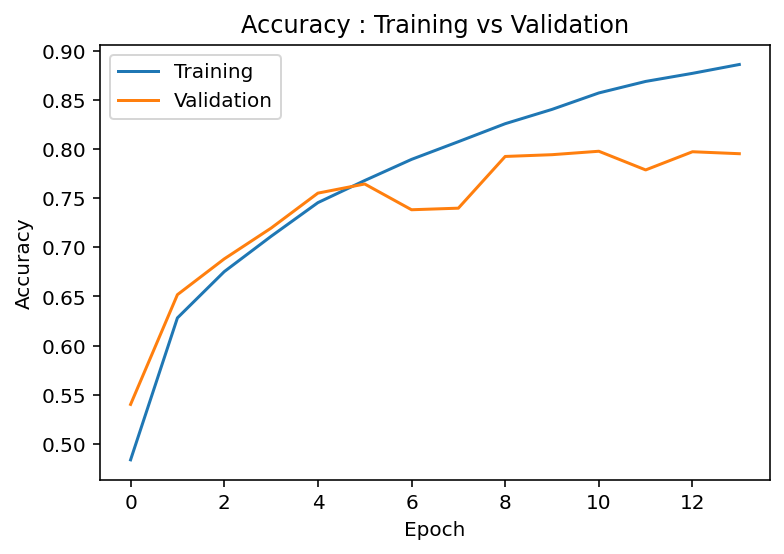

In [ ]:
if not isinstance(history, dict):
    history = history.history

plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Accuracy : Training vs Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

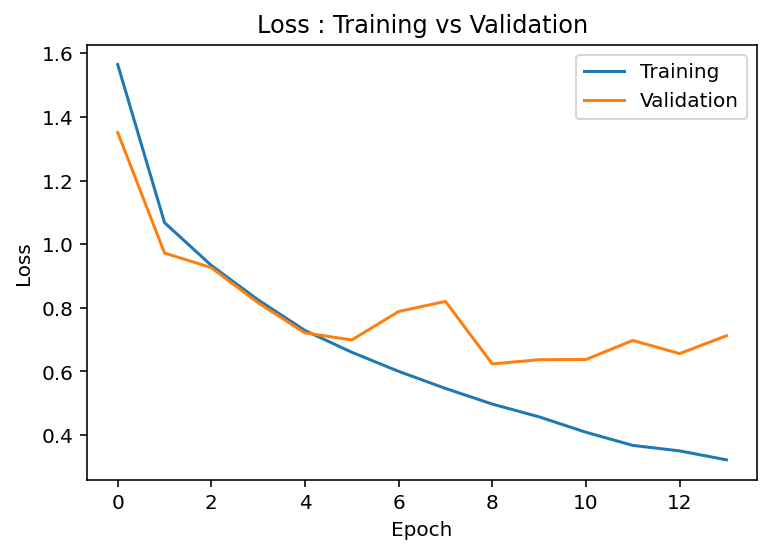

In [ ]:
if not isinstance(history, dict):
    history = history.history

plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Loss : Training vs Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

In [ ]:
# 원핫인코딩 해제
train_y = train_y.argmax(axis=1)
test_y = test_y.argmax(axis=1)

In [ ]:
pred_train = model.predict(train_x)
pred_test = model.predict(test_x)

single_pred_train = pred_train.argmax(axis=1)
single_pred_test = pred_test.argmax(axis=1)

logi_train_accuracy = accuracy_score(train_y, single_pred_train)
logi_test_accuracy = accuracy_score(test_y, single_pred_test)

print('CNN')
print(f'트레이닝 정확도 : {logi_train_accuracy*100:.2f}%')
print(f'테스트 정확도 : {logi_test_accuracy*100:.2f}%')

CNN
트레이닝 정확도 : 90.30%
테스트 정확도 : 78.54%


id = 7094
다음 그림은 Deer 입니다.
모델의 예측 : Deer
모델의 카테고리별 확률 : 
{'Airplane': 0.0, 'Automobile': 0.0, 'Bird': 0.0, 'Cat': 0.0, 'Deer': 98.0, 'Dog': 0.0, 'Frog': 0.0, 'Horse': 0.0, 'Ship': 0.0, 'Truck': 0.0}
정답입니다


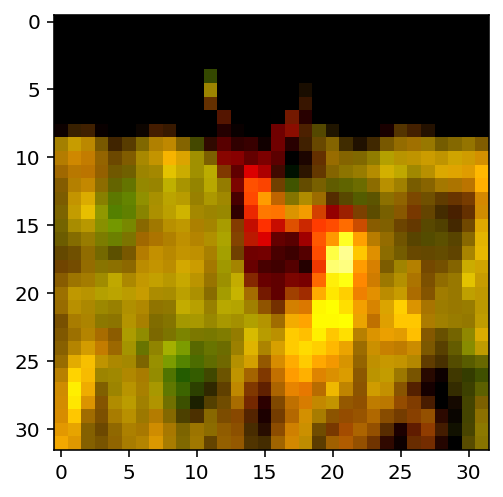

In [ ]:
'''
성능 확인을 위해
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)

print(f'id = {id}')
print(f'다음 그림은 {labels[test_y[id]]} 입니다.')
print(f'모델의 예측 : {labels[single_pred_test[id]]}')

prob = np.floor(pred_test[id]*100).tolist()
prob_dict = {}

for idx, prob in enumerate(prob) :
    prob_dict[ labels[idx] ] = prob

print('모델의 카테고리별 확률 : ')
print(prob_dict)

if test_y[id] == single_pred_test[id] :
    print('정답입니다')
else : 
    print('틀렸어요')
    
plt.imshow(test_x[id].reshape([32,32,-1]))
plt.show()

id = 7938
다음 그림은 Bird 입니다.
모델의 예측 : Dog
모델의 카테고리별 확률 : 
{'Airplane': 0.0, 'Automobile': 0.0, 'Bird': 19.0, 'Cat': 25.0, 'Deer': 3.0, 'Dog': 45.0, 'Frog': 3.0, 'Horse': 0.0, 'Ship': 0.0, 'Truck': 2.0}
틀렸어요


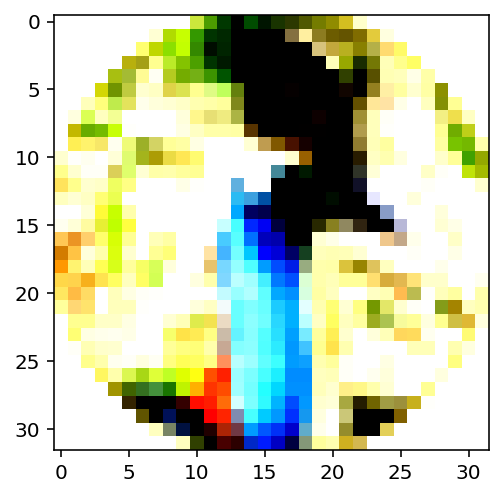

In [ ]:
'''
틀린 것만 관찰해보자!

Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

true_false = (test_y == single_pred_test)
f_id = np.where(true_false == False)[0]
f_n = len(f_id)

id = f_id[rd.randrange(0,f_n)]


print(f'id = {id}')
print(f'다음 그림은 {labels[test_y[id]]} 입니다.')
print(f'모델의 예측 : {labels[single_pred_test[id]]}')

prob = np.floor(pred_test[id]*100).tolist()
prob_dict = {}

for idx, prob in enumerate(prob) :
    prob_dict[ labels[idx] ] = prob

print('모델의 카테고리별 확률 : ')
print(prob_dict)

if test_y[id] == single_pred_test[id] :
    print('정답입니다')
else : 
    print('틀렸어요')
    
plt.imshow(test_x[id].reshape([32,32,-1]))
plt.show()